#  概述
## 集成算法
>通过在数据上构建多个模型，集成所有模型的结果，而不是单个机器学习算法。

|集成算法的目标|
| :-------|
| 集成算法会考虑多个评估器的建模结果，汇总得到一个结果上。以此老获取比单个模型更好的回归或者分类表现。|


多个模型集成成为的模型叫做模型评估器(ensemble estimator), 组成模型评估器的单个模型叫做基评估器


常见的集成算法有：  
+ 装袋法(bagging)
+ 提升法(Boosting)
+ stacking


![](images/2_1.png)

# 随机森林与决策树的对比

In [3]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()

In [6]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

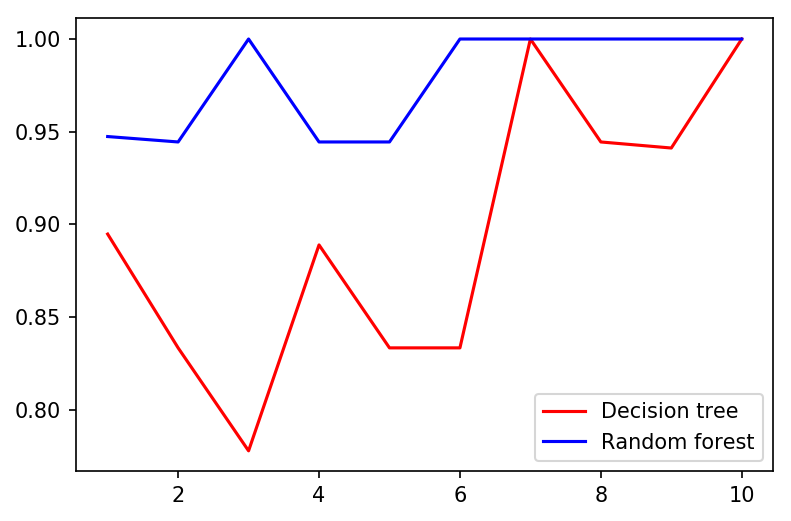

In [20]:
# 创建决策树
clf = DecisionTreeClassifier(random_state=0)
clf_s = cross_val_score(clf, wine.data, wine.target, cv=10)

# 创建随机森林
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

plt.plot(range(1, 11), clf_s, '-r',label='Decision tree')
plt.plot(range(1, 11), rfc_s, '-b', label='Random forest')

plt.legend()
plt.show()

In [23]:
rfc.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Random Forest:0.9671171171171171
Decision Tree:0.860051984757867


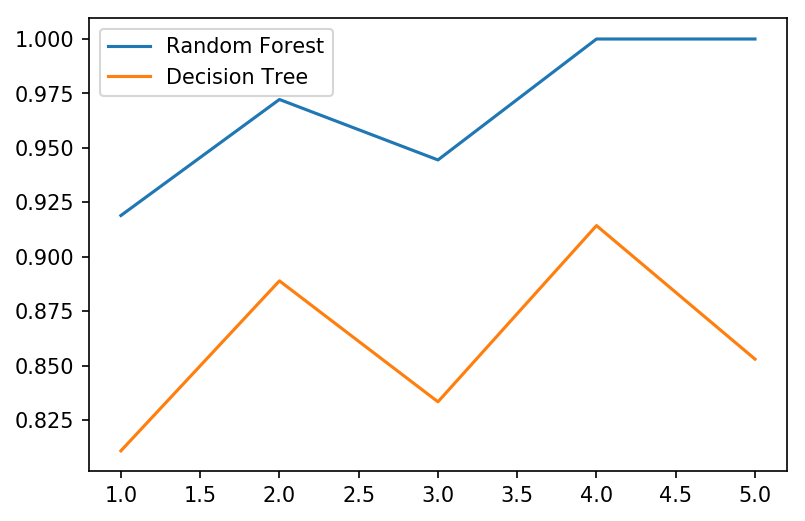

In [25]:
# 下面代码跟上面的结果一样，只是比较好玩
label = 'Random Forest'

for model in [RandomForestClassifier(n_estimators=100), DecisionTreeClassifier()]:
    s = cross_val_score(model, wine.data, wine.target, cv=5)
    print("{}:{}".format(label, s.mean()))
    plt.plot(range(1, 6), s, label=label)
    plt.legend()
    label = 'Decision Tree'
    

# 随机森林与决策书在十组交叉验证下的效果对比

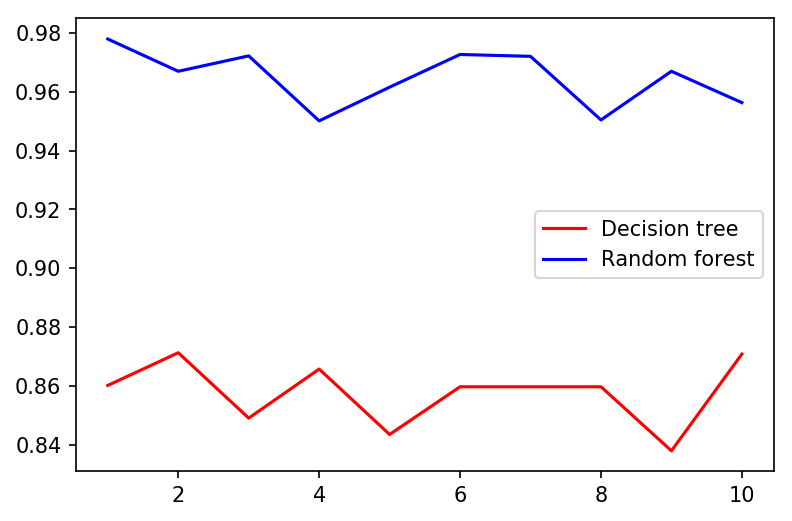

In [26]:
rfc_list = []
clf_list = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25, random_state=i)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=5)
    rfc_list.append(rfc_s.mean())
    
    clf = DecisionTreeClassifier(random_state=i)
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=5)
    clf_list.append(clf_s.mean())
    
plt.plot(range(1, 11), clf_list, '-r',label='Decision tree')
plt.plot(range(1, 11), rfc_list, '-b', label='Random forest')

plt.legend()
plt.show()

> 可以看出，随机森林一般都要比决策树好。单个决策树的波动与随机森林大多一致，因为随机森林是在决策树的基础上构建的。

# 重要参数

## n_estimators 的学习曲线

In [27]:
# receiving the return of cross_val_score mean
score_list = list()  

times = 200
for t in range(1, times+1):
    rfc = RandomForestClassifier(n_estimators=t, n_jobs=-1)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=6)
    score_list.append(rfc_s.mean())
    
print('max score: {}, index：{}'.format(max(score_list),
                                       score_list.index(max(score_list))))


max score: 0.9888888888888889, index：98


TypeError: range() takes no keyword arguments

<Figure size 1800x750 with 0 Axes>

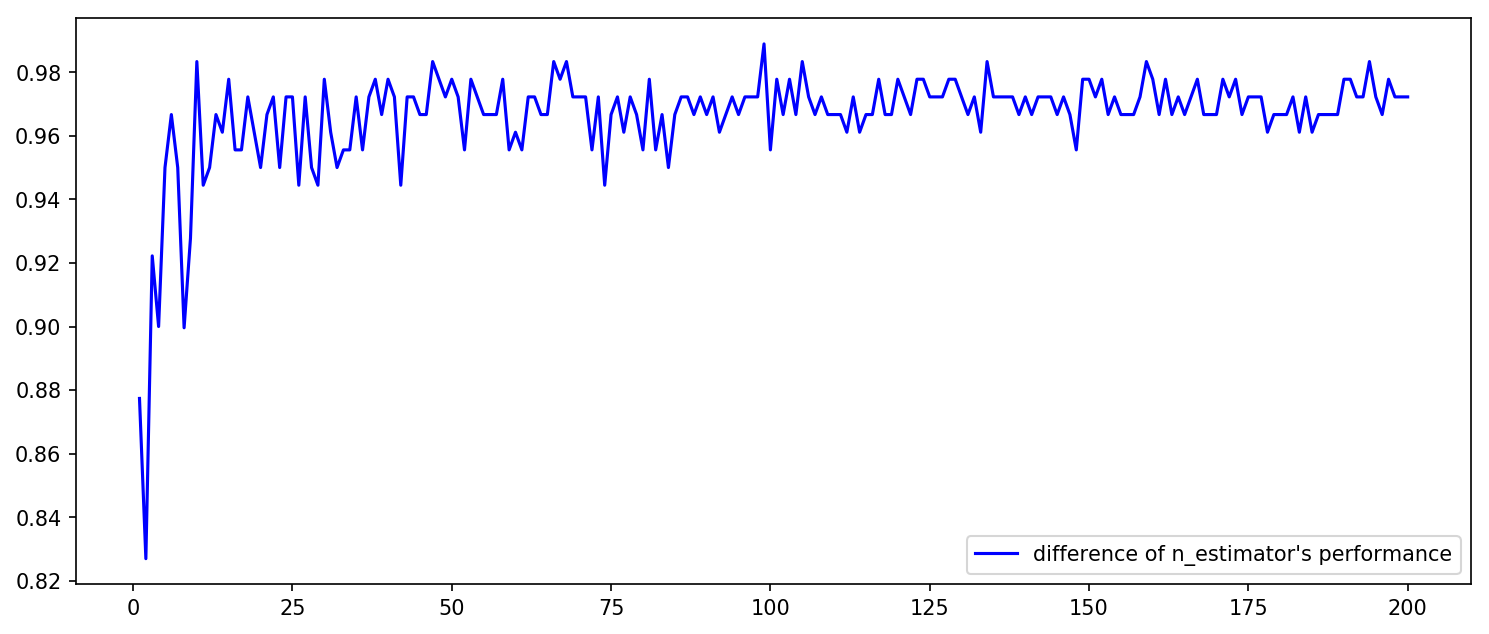

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, times+1), score_list, '-b',
              label='difference of n_estimator\'s performance')
plt.legend()
plt.show()

由上图我们可以知道，n_estimators达到一定的个数后，随机森林的效果会围绕一个值波动，所以，并非n_estimators 越大越好。越大也意味着要浪费更多的时间运行

## random_state


>先思考一个问题，随机森林用了什么方法保证了集成的效果要比单个分类器来的好呢？


随机森林的本质是装袋法，装袋集成算法是对集评估器的预测结果进行平均或者少数服从多数的原则进行集成评估结果的。  
例如，对于构建了25个集成评估器来说，只有在有13棵树或以上判断错误，随机森林才会判断错误。对于单棵树而言，其准确率在85%浮动(这里假设为80%)，则每棵树判断错误的概率为20%(设为$\epsilon$), 那么判断错误的概率为：
$$e_{random_forest} = \displaystyle \sum_{i=13}^{25}C_{25}^{i}\epsilon^i(1-\epsilon)^{25-i}$$

其中，i是判断错误的次数，也是判错的树的数量，ε是一棵树判断错误的概率，（1-ε）是判断正确的概率，共判对
25-i次。采用组合，是因为25棵树中，有任意i棵都判断错误.

In [50]:
import numpy as np 
from scipy.special import comb
import math

def proba_of_error(n_estimators, epsilon):
    """
    计算随机森林算法错误的概率
    
    Parameters
    ----------
    n_estimators : int
        基评估器的个数
    
    epsilon : float
        单个基评估器发送错误的概率
    
    Returns
    -------
    error : 随机森林算法发生错误的概率
    """
    
    middle = math.ceil(n_estimators / 2)
    errors = [comb(n_estimators, i) * 
              epsilon**i * 
              ((1 - epsilon)**(n_estimators - i)) 
              for i in range(middle, n_estimators+1)]
    return sum(errors)

In [51]:
proba_of_error(25, 0.2)

0.0003690480345558283

可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。  

那现在就有一个问题了：我们说袋装法服从多数表决原则或对基分类器结果求平均，这即是说，我们默认森林中的
每棵树应该是不同的，并且会返回不同的结果。设想一下，如果随机森林里所有的树的判断结果都一致（全判断对
或全判断错），那随机森林无论应用何种集成原则来求结果，都应该无法比单棵决策树取得更好的效果才对。但我
们使用了一样的类DecisionTreeClassifier，一样的参数，一样的训练集和测试集，为什么随机森林里的众多树会有
不同的判断结果？

这是因为sklearn中的分类树DecisionTreeClassifier本身带有随机性，这样使得每棵决策树都不一样。   
我们知道随机森林的集评估器就算决策树，当随机森林(RandomForestClassifier)中的参数设置了random_state，这不是意味每一个基评估器的random_state都设置一样。  

随机森林的random_state的设置了生成的森林随机模式，而不是森林中的一颗树。


## rfc.estimators_ 查看森林中树的情况

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(wine.data,
                                                     wine.target, 
                                                     test_size=0.3)

rfc = RandomForestClassifier(n_estimators=25, random_state=1)
rfc = rfc.fit(X_train, y_train)

In [54]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1791095845, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2135392491, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                 

In [56]:
rfc.estimators_[0].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1791095845, splitter='best')>

In [57]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1791095845
2135392491
946286476
1857819720
491263
550290313
1298508491
2143362693
630311759
1013994432
396591248
1703301249
799981516
1666063943
1484172013
729053692
1704103302
1870626073
166716594
1487394068
1800426750
1345499493
795511698
105433556
878115723


我们可以观察到，当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是
用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一
般会越来越好。用袋装法集成时，**基分类器应当是相互独立的，是不相同的。**  

但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构
筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性

## bootstrap & oob_score

随机森林的随机性体现在数据的随机选择，要让每一个基分类器不一样，一种直观的理解就是用不同的数据集去训练。装袋法的本质就是通过有**放回的抽样**来形成不同的数据集，而bootstrap就是用来控制抽样计数的参数。

**RandomForest默认的boostrap为True**，者意味者我们做有放回的抽样，一般不会改为False

![](images/2_2.png)

在一个含有n个样本的原始训练集中，我们进行随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本
放回原始训练集，也就是说下次采样时这个样本依然可能被采集到，这样采集n次，最终得到一个和原始训练集一
样大的，n个样本组成的自助集。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不
同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的基分类
器，我们的基分类器自然也就各不相同了

虽然数据采集是有放回地抽样，但是可以证明我们只能抽取到其中的63%左右的数据，所以还存在一些没有被抽取到的数据，我们称这些数据为**out-of-bag data(简称，oob)**

假设有x个样本，n个自助集，则每个样本被抽到的概率为
$$1 - (1 - \dfrac{1}{x})^n = 1 - \dfrac{1}{e} ≈ 63\%$$

所以说，当我们使用**随机森林训练模型的时候我们可以不用划分训练集和测试集，可以用oob数据进行测试**。但是，但样本的数量和n_estimators不是很大，就可能存在没有数据在oob。

如果我们想利用oob数据进行测试的话，就需要在Randomforest类传入oob_score，训练完毕后可以用rfc.oob_score_查看训练的分数。

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine


wine = load_wine()
X = wine.data
y = wine.target


In [10]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)

rfc = rfc.fit(X, y)
rfc.oob_score_

0.9831460674157303

# 重要属性和接口

重要属性：  
+ rfc.feature_importances_
+ rfc.estimators_
+ rfc.oob_score_  

重要接口：  
+ rfc.fit()
+ rfc.apply()
+ rfc.predict()
+ rfc.predict_proba

随机森林的predict_proba接口，这个接口返回每个测试样本对应的被分到每一类标签的概率，标签有几个分类
就返回几个概率。如果是二分类问题，则predict_proba返回的数值大于0.5的，被分为1，小于0.5的，被分为0。
传统的随机森林是利用袋装法中的规则，平均或少数服从多数来决定集成的结果，而sklearn中的随机森林是平均
每个样本对应的predict_proba返回的概率，得到一个平均概率，从而决定测试样本的分类

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30)
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc = rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

1.0

In [41]:
[*zip(wine.feature_names, rfc.feature_importances_)]

[('alcohol', 0.12988572648792832),
 ('malic_acid', 0.025614603032081032),
 ('ash', 0.009374887213216),
 ('alcalinity_of_ash', 0.029612359086332075),
 ('magnesium', 0.03505767398116663),
 ('total_phenols', 0.07041673485845597),
 ('flavanoids', 0.1450328353202198),
 ('nonflavanoid_phenols', 0.010118014544751239),
 ('proanthocyanins', 0.02551487911220493),
 ('color_intensity', 0.13849106193422286),
 ('hue', 0.0797571330183984),
 ('od280/od315_of_diluted_wines', 0.0943386658839796),
 ('proline', 0.20678542552704318)]

In [44]:
rfc.apply(X_test)

array([[11, 13,  5, ...,  4, 12,  4],
       [ 2,  6,  1, ..., 10,  7,  3],
       [ 2,  8,  1, ..., 13,  7,  3],
       ...,
       [13, 13,  5, ...,  4, 12, 11],
       [ 2,  8,  1, ..., 13,  7,  6],
       [ 2, 15,  1, ..., 11, 12,  3]], dtype=int64)

In [48]:
print("test result: ", rfc.predict(X_test))
print('true result: ', y_test)


test result:  [2 1 1 0 1 1 2 2 2 1 1 0 2 1 1 2 0 0 2 0 2 1 2 0 1 0 2 2 1 1]
true result:  [2 1 1 0 1 1 2 2 2 1 1 0 2 1 1 2 0 0 2 0 2 1 2 0 1 0 2 2 1 1]


In [49]:
rfc.predict_proba(X_test)

array([[0.  , 0.07, 0.93],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.98, 0.02, 0.  ],
       [0.01, 0.99, 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.01, 0.99],
       [0.18, 0.19, 0.63],
       [0.03, 0.22, 0.75],
       [0.07, 0.92, 0.01],
       [0.  , 1.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [0.  , 0.02, 0.98],
       [0.02, 0.95, 0.03],
       [0.01, 0.96, 0.03],
       [0.  , 0.36, 0.64],
       [0.67, 0.29, 0.04],
       [0.99, 0.01, 0.  ],
       [0.  , 0.06, 0.94],
       [0.93, 0.06, 0.01],
       [0.13, 0.19, 0.68],
       [0.06, 0.94, 0.  ],
       [0.01, 0.14, 0.85],
       [0.97, 0.02, 0.01],
       [0.18, 0.71, 0.11],
       [0.95, 0.04, 0.01],
       [0.  , 0.01, 0.99],
       [0.  , 0.11, 0.89],
       [0.  , 1.  , 0.  ],
       [0.17, 0.6 , 0.23]])

# Bagging的另外一个重要条件

1. 基评估器要尽可能地相互独立
2. 数据判断的准确率要超过50%，如果准确率低于50%的话，那么随机森林的效果比单个决策树来的还要差。(如果低于50%也说明当前的数据根本不时候决策树和随机森林)

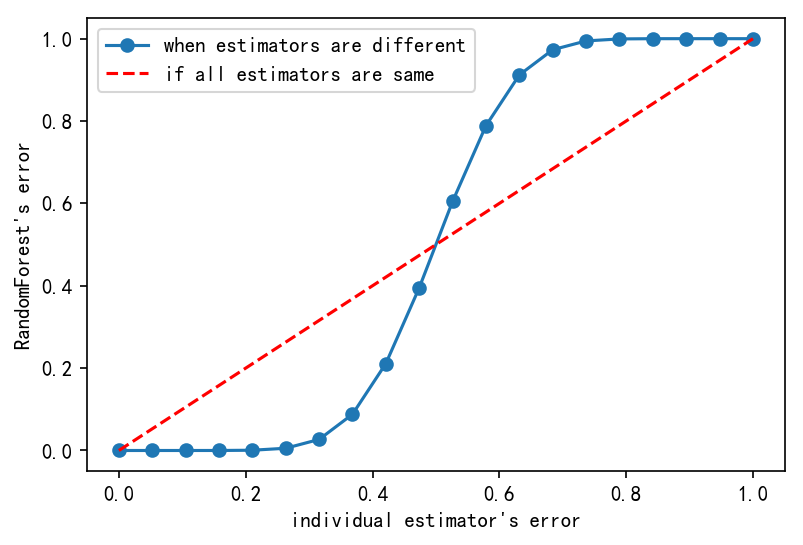

In [55]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150
# 设置x轴
x = np.linspace(0, 1, 20) 
# 用于接收误差
y = []

for epsilon in np.linspace(0, 1, 20):
    e = proba_of_error(25, epsilon)
    y.append(e)
    
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

由上图可以看出，当单个基评估器的误差很小的时候，随机森林的误差要比单个基评估器的误差来的小。但是，但基评估器的误差超过50%的时候，随机森林的误差会更大。

# RandomForestRegressor

随机森林回归的参数基本与决策树回归一样，只是多了一个n_estimators

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

In [60]:
# 加载数据
boston = load_boston()

# 实例化模型
regressor = RandomForestRegressor(n_estimators=100, random_state=1)
# 交叉验证
score = cross_val_score(regressor, 
                        boston.data,
                        boston.target,
                        cv=8, 
                        scoring='neg_mean_squared_error')

In [62]:
(score * -1).mean()

21.997858562468984

注意在这里，如果不填写scoring = "neg_mean_squared_error"，交叉验证默认的模型
衡量指标是R平方，因此交叉验证的结果可能有正也可能有负。而如果写上scoring，则衡量标准是负MSE，交叉验
证的结果只可能为负.

In [67]:
# 查看评分标准：  
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# 用随机森林填补缺失值，并且与填补0均值作比较。
在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均
值，中值，或者其他最常用的数值填补到数据中，在这个案例中，我们将使用均值，0，和随机森林回归来填补缺
失值，并验证四种状况下的拟合状况，找出对使用的数据集来说最佳的缺失值填补方法。

In [256]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

In [257]:
# 加载数据
boston = load_boston()

X_full = boston.data
y_full = boston.target

feature_names = boston.feature_names

# 获取样本的信息
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [258]:
"""设置缺失值"""

# 设置缺失值的比例
missing_rate = 0.5
# 获取缺失值的数量
missing_sample_counts = int(np.floor(n_samples * n_features * missing_rate))

# 生成缺失值的索引
rng = np.random.RandomState(1)

missing_sample_index = rng.randint(0, n_samples, missing_sample_counts)
missing_features_index = rng.randint(0, n_features, missing_sample_counts)

X_missing = X_full.copy()
y_missing = y_full.copy()

X_missing[missing_sample_index, missing_features_index] = np.nan
# 将其转换成DataFrame方便索引
X_missing = pd.DataFrame(X_missing)

In [259]:
X_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     318 non-null float64
1     321 non-null float64
2     297 non-null float64
3     290 non-null float64
4     328 non-null float64
5     279 non-null float64
6     300 non-null float64
7     304 non-null float64
8     297 non-null float64
9     302 non-null float64
10    305 non-null float64
11    321 non-null float64
12    308 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [260]:
"""用0填补缺失值"""
# 实例化模型
inputer_constant = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
# 训练
X_missing_fill_with_zero = inputer_constant.fit_transform(X_missing)

In [261]:
"""用均值填补缺失值"""
inputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_fill_with_mean = inputer_mean.fit_transform(X_missing)

In [262]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer



def rfr_fill_missing_value(X, y, strategy='mean'):
    """
       用随机森林填补缺失值。
       基本策略是：
       假设特征数据存在缺失，而target并未缺失。
       这时候我们可以把target作为特征数据，把那些数据缺失的特征作为target，
       通过随机森林模型训练，我们可以预测出缺失值。

       基本步骤是：
       1. 先找出数据缺失的特征，按从小到大排列其索引值。
       2. 从缺失值最少的特征开始，我们把其他含有缺失值的特征先用0或者均值填充。
       3. 把target作为特征的一部分进行训练
       4. 预测(predict)缺失值
       
       Parameters
       ----------
       X : array_like
           data containing missing values
           
       y : array_like
           target, it will be as parts of training data
           
       Returns
       -------
       X_missing_in_rfr : pd.DataFrame
    """
    # 将X转换成DataFrame
    X_copy = X.copy()
    X_missing_reg = pd.DataFrame(X_copy)
    
    # 1. 先找出数据缺失的特征，按从小到大排列其索引值。
    sorted_missing_index = np.argsort(X_missing_reg.notnull().sum(axis=0))
    
    for i in sorted_missing_index:
        # 2. 从缺失值最少的特征开始，我们把其他含有缺失值的特征先用0或者均值填充。
        # 2.1 取出要填补特征的列
        column_of_missing_values = X_missing_reg.iloc[:, i]

        # 2.2 取出不含填补特征的列
        data = pd.concat([X_missing_reg, pd.DataFrame(y)], axis=1)
        temp_df = data.iloc[:, X_missing_reg.columns!=i]

        # 2.3 填补数据，根据不同的策略填充不同的数据
        if strategy == "mean":
#             temp_df.fillna(temp_df.mean(), axis=0, inplace=True)
            imputer_mean = SimpleImputer(missing_values=np.nan, strategy=strategy)
            temp_arr = imputer_mean.fit_transform(temp_df)
        elif strategy == 'fill_with_zero':
            imputer_zero = SimpleImputer(missing_values=np.nan, 
                                         strategy='constant', fill_value=0)
            temp_arr = imputer_zero.fit_transform(temp_df)
            
        # 3. 划分训练集和测试集
        # 3.1 获取缺失值的索引
        null_value_index = column_of_missing_values.isnull()

        # 3.2 将不含缺失值的数据作为训练集
#         X_train = temp_df.loc[~null_value_index, :]
        y_train = column_of_missing_values.loc[~null_value_index]
        X_train = temp_arr[y_train.index, :]
        
        
        # 3.3 将含有缺失值的数据作为测试集
        y_test = temp_df.loc[null_value_index]
        X_test = temp_arr[y_test.index, :]

        # 4. 创建模型，并预测缺失值
        rfr = RandomForestRegressor(n_estimators=100, random_state=1)
        rfr = rfr.fit(X_train, y_train)
        y_predict = rfr.predict(X_test)

        # 5. 将训练得到的数据填充对应列缺失值
        X_missing_reg.loc[null_value_index, i] = y_predict
#         break
    return X_missing_reg

In [274]:
X_missing_reg = rfr_fill_missing_value(X_missing.values, y_full, 'fill_with_zero')

## 对填好的数据进行建模

In [284]:
X = [X_full, X_missing_fill_with_mean, X_missing_fill_with_zero, X_missing_reg]

# 定义空列表接收返回的均方误差
mse = []
for data in X:
    rfr = RandomForestRegressor(n_estimators=100, random_state=1)
    score = cross_val_score(rfr, data, y_full, cv=8,
                            scoring='neg_mean_squared_error').mean()
    mse.append(score * (-1))

In [285]:
mse

[21.997858562468984,
 36.452253607669896,
 39.388518943390366,
 28.766275797433025]

## 画图

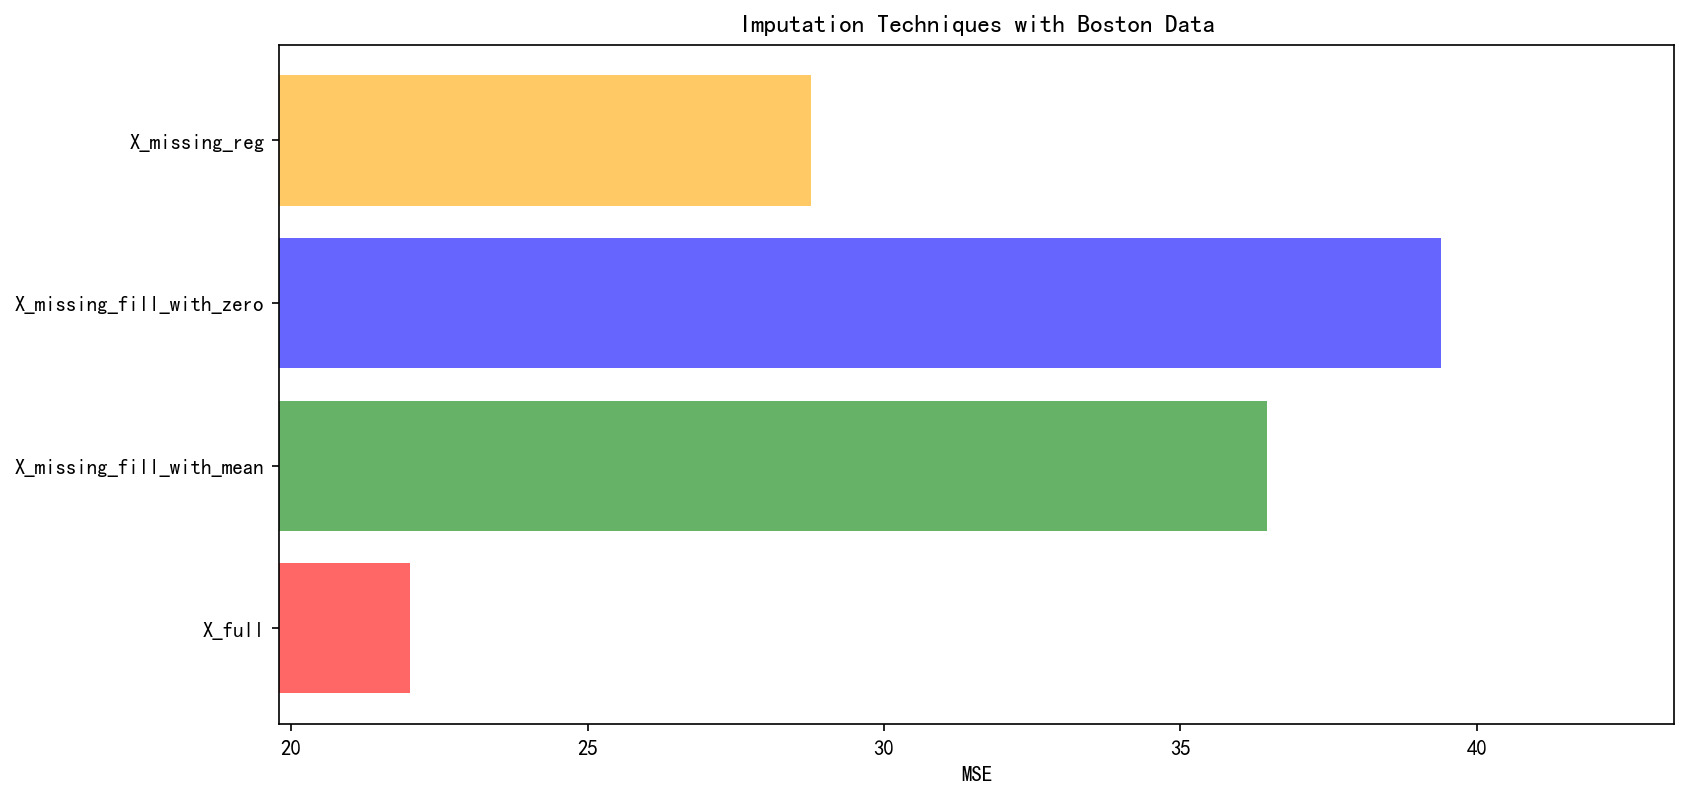

In [279]:
x_labels = ['X_full', 'X_missing_fill_with_mean', 'X_missing_fill_with_zero', 'X_missing_reg']

colors = ['r', 'g', 'b', 'orange']

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in range(len(mse)):
    ax.barh(i, mse[i], color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [282]:
X_missing_copy = X_missing.copy()
data = X_missing_copy.apply(lambda x: x.fillna(x.mean()))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

# 机器学习的调参思想

## 机器学习的调参方法
1. 画学习曲线
2. 网格搜索
 
在数据集很小的情况下，以上两种方法都非常有效。但是，当数据集很大时，这种调参的方法非常浪费时间。

## 机器学习的调参思想
找准目标：  
一般在机器学习中我们都有一个评估模型的指标，我们要做的就是尽可能的让这个指标变得更好。在机器学习中，我们把**衡量一个模型在未知数据上的准确程度，称之为泛化误差(Generalization error)。**

>泛化误差。  
当模型在未知数据（测试集或者袋外数据）上表现糟糕时，我们说模型的泛化程度不够，泛化误差大，模型的效果
不好。泛化误差受到模型的结构（复杂度）影响。看下面这张图，它准确地描绘了泛化误差与模型复杂度的关系，
当模型太复杂，模型就会过拟合，泛化能力就不够，所以泛化误差大。当模型太简单，模型就会欠拟合，拟合能力
就不够，所以误差也会大。只有当模型的复杂度刚刚好的才能够达到泛化误差最小的目标

![](images/2_3.png)

模型的复杂度与参数的关系：  
对于树模型来说，树越茂盛，深度越深，枝叶越多，模型就越复杂。所
以树模型是天生位于图的右上角的模型，随机森林是以树模型为基础，所以随机森林也是天生复杂度高的模型。随
机森林的参数，都是向着一个目标去：减少模型的复杂度，把模型往图像的左边移动，防止过拟合。当然了，调参
没有绝对，也有天生处于图像左边的随机森林，所以调参之前，我们要先判断，模型现在究竟处于图像的哪一边。

1. 模型过于简单或者过于复杂，会让泛化误差变大，而我们的目标是让泛化误差达到最低。
2. 模型太复杂很容易过拟合， 模型太简单很容易欠拟合
3. 对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂
4. 树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动


树模型中参数的影响：  
![](images/2_4.png)

# 示例：随机森林在乳腺癌数据上的调参

In [288]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [289]:
data = load_breast_cancer()
X = data.data
y = data.target

In [293]:
# 创建模型并评估模型
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
score_pre = cross_val_score(rfc, X, y, cv=8).mean()

In [295]:
score_pre

0.956250698636262

## 第一步：调整n_estimators

In [309]:
# 定义一个空列表用于接收返回的分数
scores = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=1)
    score = cross_val_score(rfc, X, y, cv=8).mean()
    scores.append(score)

In [310]:
print('最大分数为：{}, 对应的n_estimators为：{}'.format(max(scores), 
                                             scores.index(max(scores))*10 +1))

最大分数为：0.9614590319695954, 对应的n_estimators为：161


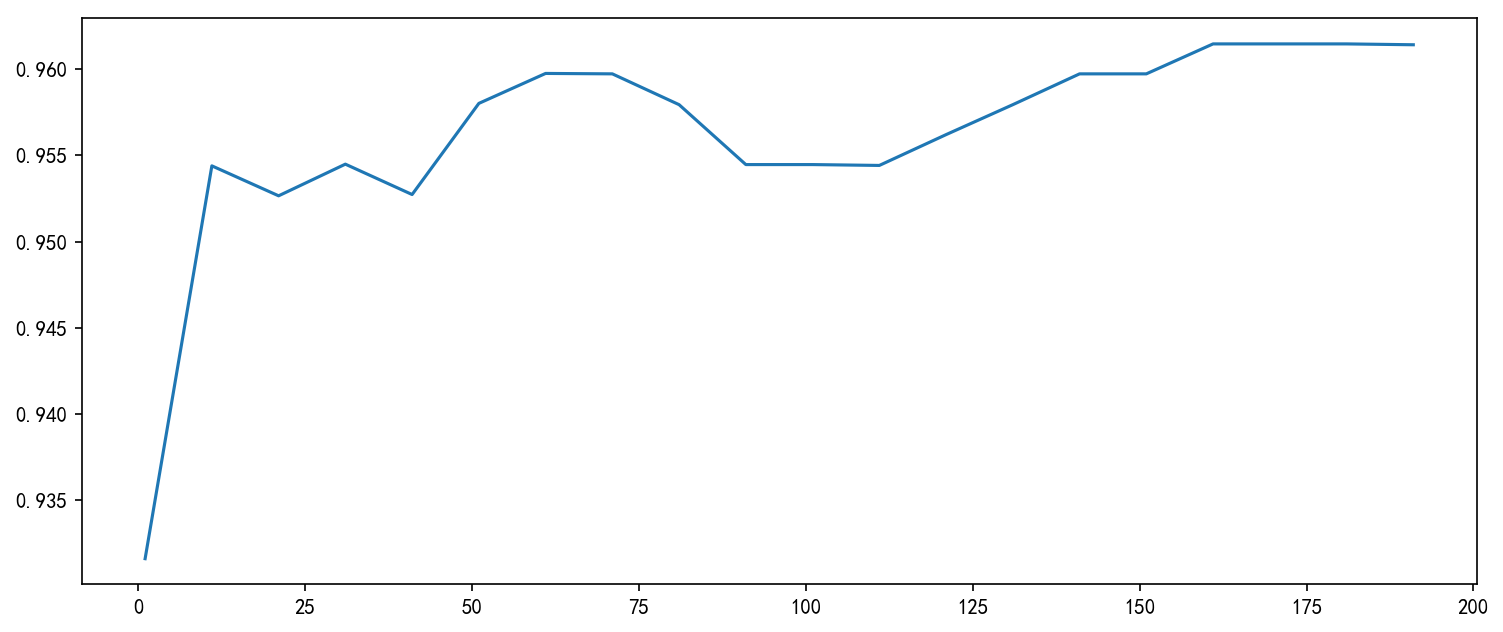

In [311]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 201, 10), scores)
plt.show()

In [305]:
scores = []
for i in range(155, 166):
    rfc = RandomForestClassifier(n_estimators=i, random_state=1)
    score = cross_val_score(rfc, X, y, cv=8).mean()
    scores.append(score)

In [307]:
print('最大分数为：{}'.format(max(scores)))

最大分数为：0.9614590319695954


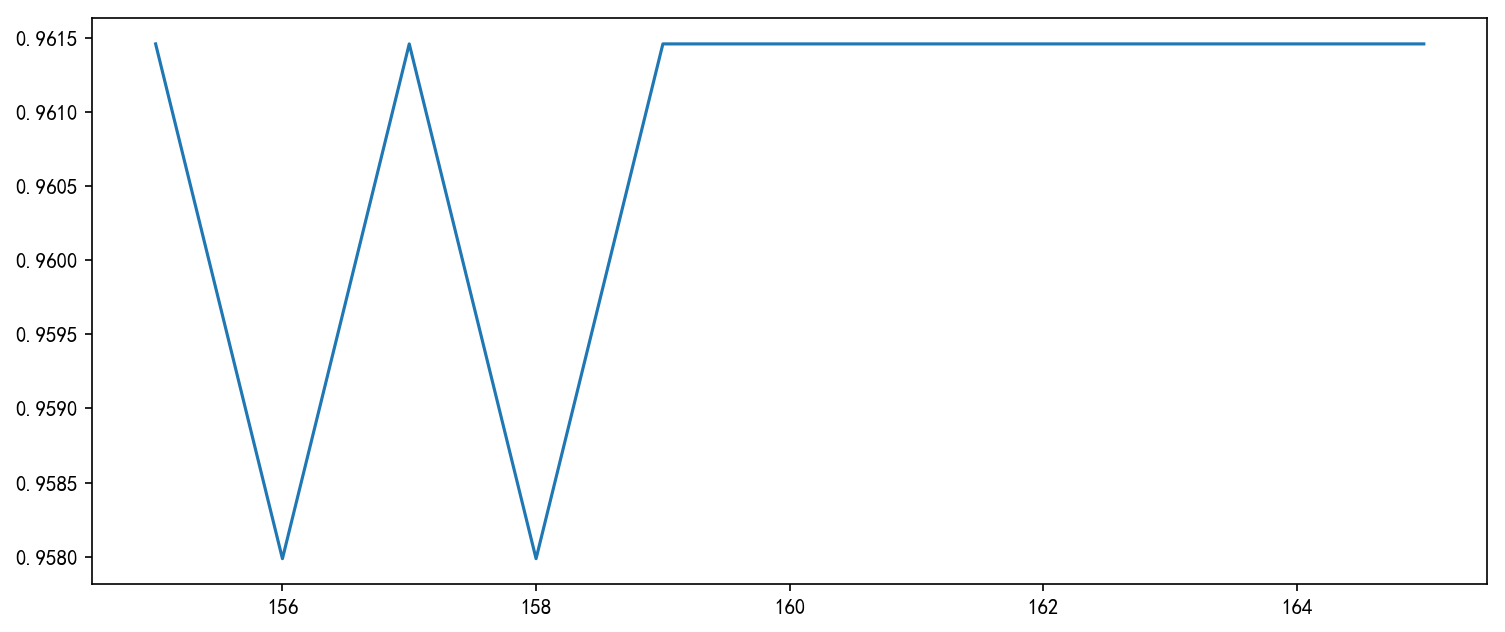

In [308]:
plt.figure(figsize=(12, 5))
plt.plot(range(155, 166), scores)

由上图我们可以看出n_estimators取155时，模型达到最优

## 第二步：调整max_depth

In [312]:
parameters = {
    'max_depth' : np.arange(1, 20)
}

rfc = RandomForestClassifier(n_estimators=155, random_state=1)
GS = GridSearchCV(rfc, parameters, cv=8)
GS.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=155, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_

In [315]:
GS.best_params_

{'max_depth': 9}

In [316]:
GS.best_score_

0.961335676625659

## 第三步：调整max_features

In [319]:
parameters = {
    'max_features' : np.arange(1, 30)
}

rfc = RandomForestClassifier(n_estimators=155, random_state=1)
GS = GridSearchCV(rfc, parameters, cv=8)
GS.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=155, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_

In [320]:
GS.best_params_

{'max_features': 18}

In [321]:
GS.best_score_

0.9666080843585237

## 第四步：调整min_samples_leaf


In [323]:
parameters = {
    'min_samples_leaf' : np.arange(1, 20)
}

rfc = RandomForestClassifier(n_estimators=155, max_features=18, random_state=1)
GS = GridSearchCV(rfc, parameters, cv=8)
GS.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=18,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=155, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samp

In [324]:
GS.best_params_

{'min_samples_leaf': 1}

In [325]:
GS.best_score_

0.9666080843585237

## 第五步：调整min_samples_split


In [326]:
parameters = {
    'min_samples_split' : np.arange(2, 22)
}

rfc = RandomForestClassifier(n_estimators=155, max_features=18, random_state=1)
GS = GridSearchCV(rfc, parameters, cv=8)
GS.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=18,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=155, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samp

In [327]:
GS.best_params_

{'min_samples_split': 10}

In [328]:
GS.best_score_

0.968365553602812

## 最后一步：调整criterion


In [330]:
parameters = {
    'criterion' : ['gini', 'entropy']
}

rfc = RandomForestClassifier(n_estimators=155, min_samples_split=10,
                             max_features=18, random_state=1)
GS = GridSearchCV(rfc, parameters, cv=8)
GS.fit(X, y)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=18,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=155, n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criteri

In [331]:
GS.best_params_

{'criterion': 'gini'}

In [332]:
GS.best_score_

0.968365553602812

# 示例：随机森林在titanic数据集上的表现

In [433]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [434]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [435]:
titanic.drop(['alive', 'adult_male','alone', 'who', 'deck', 'class', 'embark_town'], axis=1, inplace=True)

In [438]:
sex_labels = titanic['sex'].unique().tolist()
titanic['sex'] = titanic['sex'].apply(lambda x:sex_labels.index(x))

In [454]:
# 删除embarked中含有nan的整条数据
titanic_data = titanic[titanic['embarked'].notnull()]

In [457]:
embarked_labels = titanic['embarked'].unique().tolist()
titanic_data['embarked'] = titanic_data['embarked'].apply(lambda x: embarked_labels.index(x))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [461]:
def fill_na(x):
    x['age'] = x['age'].fillna(x['age'].mean())
    return x
titanic_data = titanic_data.groupby('sex').apply(fill_na)

In [487]:
X = titanic_data.loc[:, titanic_data.columns!='survived']
# 将数据扁平化
y = titanic_data.loc[:, titanic_data.columns=='survived'].values.ravel()

## 构建模型
### 第一步：按默认创建模型

In [513]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np

In [489]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
score = cross_val_score(rfc, X, y, cv=10).mean()

## 第二步：调整n_estimators

In [492]:
scores = []
for i in range(0, 200, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=1)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    scores.append(score)

In [493]:
print('最大分数为：{}, 对应的n_estimators为：{}'.format(max(scores), 
                                             scores.index(max(scores))*10 +1))

最大分数为：0.8121807967313586, 对应的n_estimators为：81


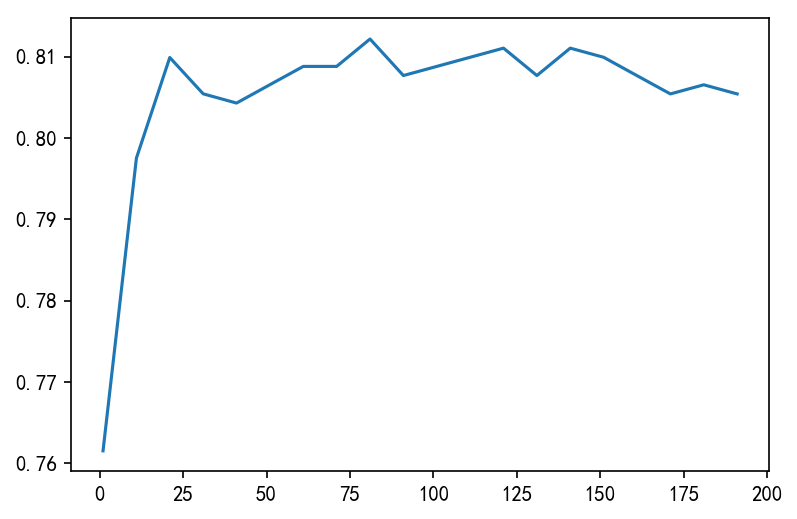

In [495]:
plt.plot(range(1, 201, 10), scores)

In [500]:
scores = []
for i in range(75, 85):
    rfc = RandomForestClassifier(n_estimators=i+1, random_state=1)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    scores.append(score)

In [501]:
print('最大分数为：', max(scores))

最大分数为： 0.8133043922369765


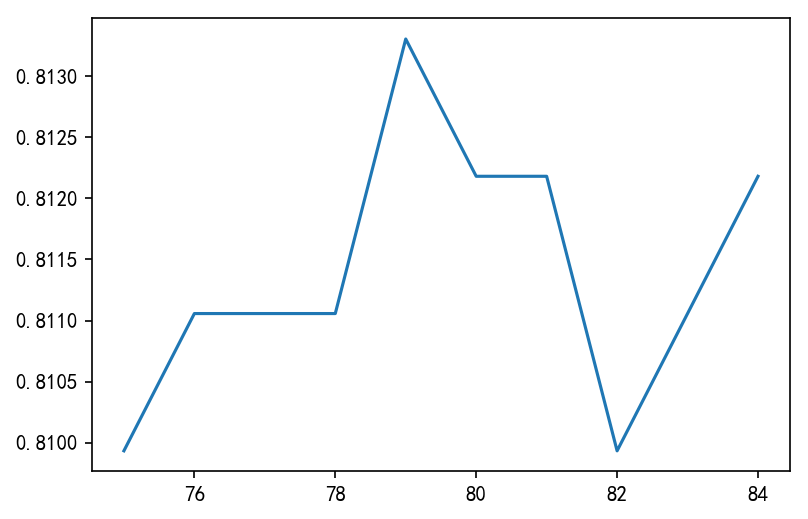

In [502]:
plt.plot(range(75, 85), scores)

由上图我们可以确定n_estimators选择为79

## 第二步：调整max_depth

In [503]:
parameters = {
    'max_depth':np.arange(1, 20)
}

rfc = RandomForestClassifier(n_estimators=79, random_state=1)

GS = GridSearchCV(rfc, parameters, cv=10)

GS = GS.fit(X, y)

In [504]:
GS.best_params_

{'max_depth': 5}

In [506]:
GS.best_score_

0.8357705286839145

## 第三步：调整max_features


In [507]:
parameters = {
    'max_features':np.arange(1, len(X.columns)+1)
}

rfc = RandomForestClassifier(n_estimators=79, max_features=5,random_state=1)

GS = GridSearchCV(rfc, parameters, cv=10)

GS = GS.fit(X, y)

In [508]:
GS.best_params_

{'max_features': 4}

In [509]:
GS.best_score_

0.8245219347581553

### 第四步：调整min_samples_leaf

In [510]:
parameters = {
    'min_samples_leaf':np.arange(1, 30)
}

rfc = RandomForestClassifier(n_estimators=79, max_features=5,random_state=1)

GS = GridSearchCV(rfc, parameters, cv=10)

GS = GS.fit(X, y)

In [511]:
GS.best_params_

{'min_samples_leaf': 4}

In [512]:
GS.best_score_

0.8346456692913385

## 使用多参数网格搜索

In [ ]:
parameters = {
    'n_estimators' : np.arange(50, 150),
    'max_depth' : np.arange(1, 20),
    'max_features': np.arange(1, len(X.columns)),
    'min_samples_leaf': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10)
}
rfc = RandomForestClassifier(random_state=1)
GS = GridSearchCV(rfc, parameters, n_jobs=-1)
GS = GS.fit(X, y)


In [ ]:
GS.best_params_

In [ ]:
GS.best_score_